# Data

In [2]:
import tensorflow as tf
import os
import PIL
import glob
import time
import imageio
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import metrics
print(tf.__version__)

# For FID
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from skimage.transform import resize
from keras.datasets import cifar10

# For GIF
from IPython import display


begin = 0
epochs = 150
batch_size = 64
lamda = 10



inception3 = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
import cv2

2.3.4


# receipt images dataset 

In [2]:
import PIL
import boto3
from PIL import Image
from io import BytesIO
import numpy as np
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')
bucket = 'verafin-mitacs-yifu-chen'
key='large-receipt-image-dataset-SRD'
pages = paginator.paginate(Bucket=bucket, Prefix=key)
paginator.paginate(Bucket=bucket, Prefix=key)

In [ ]:
images=[]
variant=[]
for page in pages:
    for obj in page['Contents']:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        im = Image.open(BytesIO(file_byte_string))
        im = im.resize((224,224))
        im = np.array(im)
        if im.shape == (224,224,3):
            images.append(im)
        else:
            variant.append(im)

In [ ]:
variant0 = np.array(variant[0])
variant0.shape

In [ ]:
len(images)

In [ ]:
X = np.array(images)
X = (X.astype(np.float32) - 127.5) / 127.5
X.shape

In [ ]:
plt.imshow(images[0]) # 32 * 32 means you cannot see anything but 1-10 from minist dataset 

In [ ]:
X = tf.data.Dataset.from_tensor_slices(X)
buffer_size = 2212
batch_size = 64
X1 = X.shuffle(buffer_size).batch(batch_size)
print(X1)
train_img = next(iter(X1))

img = train_img
print(img.shape)
print(img[0].shape, img[0].dtype, img[0].numpy().min(), img[0].numpy().max())

In [ ]:
train_data = X1.take(1)
test_data = X1.skip(1)

In [ ]:
train_data1 = (iter(train_data))
for img in train_data1:
    plt.imshow(img[0]*0.5 +0.5)
    print(img.shape)

In [189]:
list(X1) # list or as_numpy_iterator() is to see the content, while print dataset directly to se the shape and data type

[<tf.Tensor: shape=(64, 224, 224, 3), dtype=float32, numpy=
 array([[[[-0.8039216 , -0.8117647 , -0.9843137 ],
          [-0.8039216 , -0.81960785, -0.9843137 ],
          [-0.7882353 , -0.81960785, -0.9764706 ],
          ...,
          [-0.6156863 , -0.73333335, -0.8745098 ],
          [-0.60784316, -0.7254902 , -0.85882354],
          [-0.6156863 , -0.7176471 , -0.85882354]],
 
         [[-0.79607844, -0.81960785, -0.9843137 ],
          [-0.8039216 , -0.827451  , -0.9843137 ],
          [-0.79607844, -0.8352941 , -0.99215686],
          ...,
          [-0.70980394, -0.8117647 , -0.9607843 ],
          [-0.70980394, -0.81960785, -0.9607843 ],
          [-0.7176471 , -0.81960785, -0.9529412 ]],
 
         [[-0.79607844, -0.827451  , -0.9843137 ],
          [-0.8039216 , -0.81960785, -0.9843137 ],
          [-0.8039216 , -0.8352941 , -0.99215686],
          ...,
          [-0.7019608 , -0.7882353 , -0.92941177],
          [-0.7176471 , -0.79607844, -0.9372549 ],
          [-0.69411767

In [12]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.take(6)
list(dataset.as_numpy_iterator())

[0, 1, 2, 3, 4, 5]

In [13]:
dataset = tf.data.Dataset.range(8)
dataset = dataset.batch(3)
dataset1 = dataset.take(2)
print(list(dataset.as_numpy_iterator()))
print(list(dataset1.as_numpy_iterator()))

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7])]
[array([0, 1, 2]), array([3, 4, 5])]


In [14]:
from skimage.transform import resize
resize(train_img[0], (229,229,3)).shape

(229, 229, 3)

In [190]:
batch_train=128
batch_test=128

train_data_ = X.shuffle(buffer_size).batch(batch_train).repeat()
train_data_it = iter(train_data_)


test_data_ = X.shuffle(50000).batch(batch_test).repeat()
test_data_it = iter(test_data_)

In [191]:
print(train_data_)

<RepeatDataset shapes: (None, 224, 224, 3), types: tf.float32>


In [192]:
train_data_itr = next(iter(train_data_))
train_data_itr.shape

TensorShape([128, 224, 224, 3])

# check images

In [3]:
import os
import glob
files = glob.glob('localdir/check_image/*.jpeg')
files_jpg = glob.glob('localdir/check_image/*.jpg')
files_png = glob.glob('localdir/traditional_gen_images/*.png')
check_img = files + files_jpg + files_png

In [4]:
images=[]
for filename in check_img:
    img = cv2.imread(filename)
    resized_img = cv2.resize(img, (224,224))
    images.append(resized_img)

In [5]:
X = np.array(images)
X = (X.astype(np.float32) - 127.5) / 127.5
X.shape

(1774, 224, 224, 3)

In [6]:
X = tf.data.Dataset.from_tensor_slices(X)
buffer_size = 2212
batch_size = 16
X1 = X.shuffle(buffer_size).batch(batch_size)
print(X1)
train_img = next(iter(X1))

img = train_img
print(img.shape)
print(img[0].shape, img[0].dtype, img[0].numpy().min(), img[0].numpy().max())

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>
(16, 224, 224, 3)
(224, 224, 3) <dtype: 'float32'> -1.0 1.0


(16, 224, 224, 3)


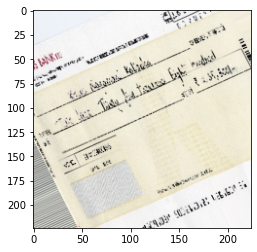

In [7]:
train_data = X1.take(1)
test_data = X1.skip(1)
train_data1 = (iter(train_data))
for img in train_data1:
    plt.imshow(img[0]*0.5 +0.5)
    print(img.shape)

In [8]:
batch_train=16
batch_test=16

train_data_ = X.shuffle(buffer_size).batch(batch_train).repeat()
train_data_it = iter(train_data_)


test_data_ = X.shuffle(50000).batch(batch_test).repeat()
test_data_it = iter(test_data_)

# Model

## spectral normalization

In [9]:
class SpectralNormalization(tf.keras.layers.Wrapper):
    def __init__(self, layer, iteration=1, eps=1e-12, training=True, **kwargs):
        self.iteration = iteration
        self.eps = eps
        self.do_power_iteration = training
        if not isinstance(layer, tf.keras.layers.Layer):
            raise ValueError(
                'Please initialize `TimeDistributed` layer with a '
                '`Layer` instance. You passed: {input}'.format(input=layer))
        super(SpectralNormalization, self).__init__(layer, **kwargs)

    def build(self, input_shape):
        self.layer.build(input_shape)

        self.w = self.layer.kernel
        self.w_shape = self.w.shape.as_list()

        self.v = self.add_weight(shape=(1, self.w_shape[0] * self.w_shape[1] * self.w_shape[2]),
                                 initializer=tf.initializers.TruncatedNormal(stddev=0.02),
                                 trainable=False,
                                 name='sn_v',
                                 dtype=tf.float32)

        self.u = self.add_weight(shape=(1, self.w_shape[-1]),
                                 initializer=tf.initializers.TruncatedNormal(stddev=0.02),
                                 trainable=False,
                                 name='sn_u',
                                 dtype=tf.float32)

        super(SpectralNormalization, self).build()

    def call(self, inputs):
        self.update_weights()
        output = self.layer(inputs)
        self.restore_weights()  # Restore weights because of this formula "W = W - alpha * W_SN`"
        return output
    
    def update_weights(self):
        w_reshaped = tf.reshape(self.w, [-1, self.w_shape[-1]])
        u_hat = self.u
        v_hat = self.v  # init v vector

        if self.do_power_iteration:
            for _ in range(self.iteration):
                v_ = tf.matmul(u_hat, tf.transpose(w_reshaped))
                v_hat = v_ / (tf.reduce_sum(v_**2)**0.5 + self.eps)

                u_ = tf.matmul(v_hat, w_reshaped)
                u_hat = u_ / (tf.reduce_sum(u_**2)**0.5 + self.eps)

        sigma = tf.matmul(tf.matmul(v_hat, w_reshaped), tf.transpose(u_hat))
        self.u.assign(u_hat)
        self.v.assign(v_hat)

        self.layer.kernel.assign(self.w / sigma)

    def restore_weights(self):
        self.layer.kernel.assign(self.w)

## Attention

In [10]:
def attention_flatten(x) :
    batchsize = -1 if x.shape[0] == None else x.shape[0]
    outputshape = [batchsize, x.shape[1]*x.shape[1], x.shape[3]] 
  
    reshape = tf.reshape(x, shape=outputshape)
    
    return reshape
      
  

class Attention(keras.Model):

    def __init__(self, channel, flag=False):
        super(Attention, self).__init__()
        self.channel = channel
        self.flag = flag
        self.conv_f = keras.layers.Conv2D(self.channel//8, 1, 1, 'valid') 
        self.conv_g = keras.layers.Conv2D(self.channel//8, 1, 1, 'valid') 
        self.conv_h = keras.layers.Conv2D(self.channel, 1, 1, 'valid') 
        self.conv_o = keras.layers.Conv2D(self.channel, 1, 1, 'valid') 
        self.gamma = tf.Variable(tf.zeros(shape=[1]))
        
    def call(self, x):
        f = self.conv_f(x)
        g = self.conv_g(x)
        h = self.conv_h(x)
        
        f, g, h = attention_flatten(f), attention_flatten(g), attention_flatten(h)
        
        mul = tf.matmul(g, f, transpose_b=True)
        
        attention_map = tf.nn.softmax(mul, axis=-1)

        o = tf.matmul(attention_map, h)
        
        outputshape = x.shape
        
        if x.shape[0] == None:
            outputshape = [-1, x.shape[1], x.shape[2], x.shape[3]]
        
        o = tf.reshape(o, shape=outputshape) 
        
        o = self.conv_o(o)

        x = self.gamma * o + x
        
        if self.flag == True:
              return x, attention_map
        else:
              return x

# Generator

In [11]:
weight_initializer = tf.keras.initializers.TruncatedNormal(stddev=0.2, mean=0,
                                                          seed=42)

In [14]:
class Generator(keras.Model):

    def __init__(self):
        super(Generator, self).__init__()
        # input img is [b, 100]
        
        self.channel = 128
        self.dense = keras.layers.Dense(14*14*self.channel) #original 4 * 4 * 512
        
        self.conv1 = SpectralNormalization(keras.layers.Conv2DTranspose(256, 4, 2, 'same', use_bias=False) )
        self.batch1 = keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        
        self.attention= Attention(channel=256, flag=True)
        
        self.conv2 = SpectralNormalization(keras.layers.Conv2DTranspose(128, 4, 2, 'same', use_bias=False) )
        self.batch2 = keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        
        self.conv3 = SpectralNormalization(keras.layers.Conv2DTranspose(64, 4, 2, 'same', use_bias=False) )
        self.batch3 = keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        
        self.conv4 = SpectralNormalization(keras.layers.Conv2DTranspose(32, 4, 2, 'same', use_bias=False) )
        self.batch4 = keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5)
        
        
        
        self.conv5 = keras.layers.Conv2DTranspose(3, 3, 1, 'same', use_bias=False) #filter size is 1 in the original paper
    
        
        return

    def call(self, inputs, training=None):
        # [b, 100] => [b, 14, 14, 512]
        x = self.dense(inputs)
        x = tf.reshape(x, shape = [-1, 14, 14, 128])
        x = tf.nn.leaky_relu(x)
        
        # [b, 14, 14, 512] => [b, 28, 28, 256]
        x = self.conv1(x)
        x = self.batch1(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        x, gmap = self.attention(x)  #try to put attention layer at somewhere else
        
        # [b, 28, 28, 256] => [b, 56, 56, 128]
        x = self.conv2(x)
        x = self.batch2(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        #x, gmap = self.attention(x)  #try to put attention layer at somewhere else
        
        # [b, 56, 56, 128] => [b, 112, 112, 64]
        x = self.conv3(x)
        x = self.batch3(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        # [b, 112, 112, 64] => [b, 224, 224, 3]
        x = self.conv4(x)
        x = self.batch4(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        #x, gmap = self.attention(x)  #try to put attention layer at somewhere else
        
        # [b, 224, 224, 64] => [b, 224, 224, 3]
        x=self.conv5(x)
        x = tf.tanh(x)
        
        return x, gmap
    
    def model(self):  
        x = keras.Input(shape=(100,)) #shape=(110,)?
        return keras.Model(inputs=[x], outputs=self.call(x))

class Generator(keras.Model):

    def __init__(self):
        super(Generator, self).__init__()
        # input img is [b, 100]
        
        self.channel = 512
        self.dense = keras.layers.Dense(4*4*self.channel)  
        
        self.conv1 = SpectralNormalization(keras.layers.Conv2DTranspose(256, 4, 2, 'same', use_bias=False) )
        self.batch1 = keras.layers.BatchNormalization()
        
        self.conv2 = SpectralNormalization(keras.layers.Conv2DTranspose(128, 4, 2, 'same', use_bias=False) )
        self.batch2 = keras.layers.BatchNormalization()
        
        self.conv3 = SpectralNormalization(keras.layers.Conv2DTranspose(64, 4, 2, 'same', use_bias=False) )
        self.batch3 = keras.layers.BatchNormalization()
        
        self.attention= Attention(channel=256, flag=True)
        
        self.conv4 = keras.layers.Conv2DTranspose(3, 3, 1, 'same', use_bias=False) #filter size is 1 in the original paper
    
        
        return

    def call(self, inputs, training=None):
        # [b, 100] => [b, 4, 4, 512]
        x = self.dense(inputs)
        x = tf.reshape(x, shape = [-1, 4, 4, 512])
        x = tf.nn.leaky_relu(x)
        
        # [b, 4, 4, 512] => [b, 8, 8, 256]
        x = self.conv1(x)
        x = self.batch1(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        x, gmap = self.attention(x)
        
        # [b, 8, 8, 256] => [b, 16, 16, 128]
        x = self.conv2(x)
        x = self.batch2(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        # [b, 16, 16, 128] => [b, 32, 32, 64]
        x = self.conv3(x)
        x = self.batch3(x, training = training)
        x = tf.nn.leaky_relu(x)
        
        # [b, 32, 32, 64] => [b, 32, 32, 3]
        x = self.conv4(x)
        x = tf.tanh(x)
        
        return x, gmap
    
    def model(self):  
        x = keras.Input(shape=(100,)) #shape=(110,)?
        return keras.Model(inputs=[x], outputs=self.call(x))

In [15]:
generator = Generator()


noise = tf.random.normal([1,100])
print(noise.dtype)
generated_image, g_map = generator(noise, training=False)
print(generator.summary())
print('geneated_img:', generated_image.shape, generated_image.dtype, tf.reduce_min(generated_image), tf.reduce_max(generated_image))
print('g_map1:', g_map.shape, g_map.dtype, tf.reduce_min(g_map), tf.reduce_max(g_map))

<dtype: 'float32'>
Model: "generator_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  2533888   
_________________________________________________________________
spectral_normalization_4 (Sp multiple                  528512    
_________________________________________________________________
batch_normalization_98 (Batc multiple                  1024      
_________________________________________________________________
attention_1 (Attention)      multiple                  148033    
_________________________________________________________________
spectral_normalization_5 (Sp multiple                  526592    
_________________________________________________________________
batch_normalization_99 (Batc multiple                  512       
_________________________________________________________________
spectral_normalization_6 (Sp multipl

In [16]:
class Discriminator(keras.Model):

    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.conv1 = SpectralNormalization( keras.layers.Conv2D(64, 4, 2, 'same') )

        self.conv2 = SpectralNormalization( keras.layers.Conv2D(128, 4, 2, 'same') )
        
        self.attention= Attention(channel=128, flag=False)
        
        self.conv3 = SpectralNormalization( keras.layers.Conv2D(256, 4, 2, 'same') )
        
        self.conv4 = SpectralNormalization( keras.layers.Conv2D(512, 4, 2, 'same') )
        
        self.conv5 = keras.layers.Conv2D(512, 3, 1, 'same') 

        self.flatten = keras.layers.Flatten()

        self.dense = keras.layers.Dense(1)
        return

    def call(self, inputs, training=None):
        inp = inputs
        # [b, 32, 32, 3] => [b, 16, 16, 64]
        x = self.conv1(inp)
        x = tf.nn.leaky_relu(x)
        
        
        # [b, 16, 16, 64] => [b, 8, 8, 128]
        x = self.conv2(x)
        x = tf.nn.leaky_relu(x)
        
        x = self.attention(x)
        
        # [b, 8, 8, 128] => [b, 4, 4, 256]
        x = self.conv3(x)
        x = tf.nn.leaky_relu(x)
        
        # [b, 4, 4, 256] => [b, 4, 4, 512]
        x = self.conv4(x)
        x = tf.nn.leaky_relu(x)
        
         # [b, 4, 4, 256] => [b, 4, 4, 512]
        x = self.conv5(x)
        x = tf.nn.leaky_relu(x)
        
        # [b, 4, 4, 512] => [b, 4*4*512]
        x = self.flatten(x)
        
        # x = tf.concat(x, axis=-1) #for concat label and noise
        
        # [b, 2*2*256] => [b, 1]
        x = self.dense(x)
        
        return x
    
    

Model: "generator_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  2784768   
_________________________________________________________________
spectral_normalization_8 (Sp multiple                  528512    
_________________________________________________________________
batch_normalization_102 (Bat multiple                  1024      
_________________________________________________________________
attention_2 (Attention)      multiple                  148033    
_________________________________________________________________
spectral_normalization_9 (Sp multiple                  526592    
_________________________________________________________________
batch_normalization_103 (Bat multiple                  512       
_________________________________________________________________
spectral_normalization_10 (S multiple                  

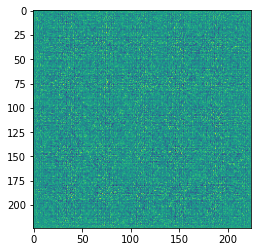

In [17]:
generator = Generator()
noise = tf.random.normal([1, 110])
generated_image, g_map = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0])
print(generator.summary())
print('geneated_img:', generated_image.shape, generated_image.dtype, tf.reduce_min(generated_image), tf.reduce_max(generated_image))
print('g_map1:', g_map.shape, g_map.dtype, tf.reduce_min(g_map), tf.reduce_max(g_map))


discriminator = Discriminator()
decision = discriminator(generated_image)
#decision = discriminator([generated_image, tf.random.normal([64, 10])])
print ('decision:', decision.shape, tf.reduce_min(decision), tf.reduce_min(decision))
# discriminator.build(input_shape=[batch_size, 32, 32, 3])
discriminator.summary()

# Loss

In [18]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(gen_output):
    
    loss = loss_obj(tf.ones_like(gen_output), gen_output)
    
    return tf.reduce_mean(loss)

  
def gradient_penalty(discriminator, img, gen_img):
    t = tf.random.uniform(shape=img.shape, minval=0, maxval=1)
    interplate = t * img + (1 - t) * gen_img
    with tf.GradientTape() as tape:
        tape.watch([interplate])
        mix_output = discriminator(interplate)
    grad = tape.gradient(mix_output, interplate)
    
    norm = tf.norm(tf.reshape(grad,[grad.shape[0], -1]), axis=1)
  
    gp = tf.square(norm - 1.)
    
    return gp

  

    
def discriminator_loss(discriminator, img, gen_img, training=True):
  
    real_output = discriminator(img, training=training)
    gen_output = discriminator(gen_img, training=training)
    loss1 = loss_obj(tf.ones_like(real_output), real_output)
    loss2 = loss_obj(tf.zeros_like(gen_output), gen_output)
    penalty = gradient_penalty(discriminator, img, gen_img)
    
    loss = tf.reduce_mean(loss1) + tf.reduce_mean(loss2) + lamda * tf.reduce_mean(penalty)
    
    return loss

# FID

In [19]:

def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        # resize with nearest neighbor interpolation
        new_image = resize(image, new_shape)
        # store
        images_list.append(new_image)
        
    return asarray(images_list)

def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = np.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    
	return fid

def calculate_fid_with_img(img1, img2):
    img1 = scale_images(img1, (299,299,3))
    img2 = scale_images(img2, (299,299,3))
    img1 = tf.keras.applications.inception_v3.preprocess_input(img1)
    img2 = tf.keras.applications.inception_v3.preprocess_input(img2)
    # calcufate fid
    fid = calculate_fid(inception3, img1, img2)

    return fid

def calculate_all_fid(generator,  real_img, training):
    img = real_img
    seed = tf.random.normal([batch_size, 100])
    fake_img, gmap = generator(seed, training=training)
    fid = calculate_fid_with_img(img, fake_img)
    
    return fid

# Visualization

In [20]:
def generate_and_save_images(model, epoch, seed, path, flag=False):
    predictions, gmap = model(seed, training=False)
    #   print(predictions.shape, predictions[0].shape,  predictions[0].dtype,  tf.reduce_min(predictions[0]),  tf.reduce_max(predictions[0]))

    fig = plt.figure(figsize=(8,8))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i] * 0.5 + 0.5 )
        plt.axis('off')
    plt.savefig(path + '{:04d}.png'.format(epoch))
    if flag == True:
      plt.show()
    plt.close()

def display_image(epoch_no):
    return PIL.Image.open('./train/sn_epoch_{:04d}.png'.format(epoch_no))


# GIF

In [21]:
def make_gif():
  anim_file = 'sn.gif'

  with imageio.get_writer(anim_file, mode='I') as writer:
      filenames = glob.glob("./train/sn_epoch_*.png")
      filenames = sorted(filenames)
      last = -1
      for i,filename in enumerate(filenames):
          frame = 2*(i**0.5)
          if round(frame) > round(last):
              last = frame
          else:
              continue
          image = imageio.imread(filename)
          writer.append_data(image)
      image = imageio.imread(filename)
      writer.append_data(image)

  import IPython
  if IPython.version_info > (6,2,0,''):
      display.Image(filename=anim_file)

# Initialize model & optimizer

In [41]:
Gen = Generator()
Dis = Discriminator()

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)

#g_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0, beta_2=0.9)
#d_optimizer = tf.keras.optimizers.Adam(4e-4, beta_1=0, beta_2=0.9)

g_optimizer = tf.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5)
d_optimizer = tf.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5) 

In [42]:
# checkpoint
checkpoint_dir = './ckpt/sn/'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(g_optimizer=g_optimizer, d_optimizer=d_optimizer, Gen=Gen, Dis=Dis)
print(checkpoint_prefix)
print()

./ckpt/sn/ckpt



# train step

In [43]:
@tf.function
def train_step(real_img):
    img = real_img
    noise = tf.random.normal([batch_size,100])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_img, gmap = Gen(noise, training=True)
        gene_output = Dis(gen_img, training=True)
        gen_loss = generator_loss(gene_output)
        disc_loss = discriminator_loss(Dis, img, gen_img, training=True)

    grad_gen = gen_tape.gradient(gen_loss, Gen.trainable_variables)
    grad_dis = disc_tape.gradient(disc_loss, Dis.trainable_variables)
    g_optimizer.apply_gradients(zip(grad_gen, Gen.trainable_variables))
    d_optimizer.apply_gradients(zip(grad_dis, Dis.trainable_variables))

    return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss)

In [44]:
X2 = next(iter(train_data))

In [45]:
train_step(X2)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.6955515>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.037548>)

# train 

In [46]:
def train(train_dataset, begin, epochs, iteration, batch_size):
    start_time = time.time()
    print('batch_size:', batch_size,', begin_iteration:', iteration, ', batch_train:', batch_train, ', batch_test:', batch_test, ', epochs:', epochs, ', gp lamda:', lamda)
    print('Begin time:{}.'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    
    # seed is for generate_and_save_images, should not be change durnig train time
    #label_for_seed = tf.squeeze(tf.one_hot(tf.random.uniform([batch_size, 1], minval=0, maxval=9, dtype=tf.dtypes.int32), depth=10, on_value=1.0, off_value=0.0, axis=-1) )
    label_for_seed = tf.squeeze(tf.one_hot(tf.random.uniform([batch_size, 1], minval=0, maxval=9, dtype=tf.dtypes.int32), depth=10, on_value=1.0, off_value=0.0, axis=-1) )
    seed = tf.random.normal([batch_size, 100]) #seed gives shape (64,110) when concat with label_for_seed
    
    total_gen_loss = total_dis_loss = 0
    per_it = 10
    for epoch in range(begin, epochs):
        for step, img in enumerate(train_dataset):
            iteration += 1
            gen_loss, disc_loss = train_step(img)
            total_gen_loss += float(gen_loss)
            total_dis_loss += float(disc_loss)
            if iteration % per_it == 0:
                test_it = next(test_data_it)
                test_fid_score = calculate_all_fid(Gen, test_it, training=True)
                train_it = next(train_data_it)
                train_fid_score = calculate_all_fid(Gen, train_it, training=True)
                
                with train_summary_writer.as_default():
                    tf.summary.scalar('train_FID', train_fid_score, step=iteration)
                    tf.summary.scalar('test_FID', test_fid_score, step=iteration)
                    tf.summary.scalar('Generator', total_gen_loss / per_it, step=iteration)
                    tf.summary.scalar('Discriminator', total_dis_loss / per_it, step=iteration)
                print("Epoch: {}, iteration:{}, train_fid :{:.2f}, test_fid :{:.2f}, gene_loss: {:.2f}, disc_loss: {:.2f}.".format( epoch + 1, iteration, train_fid_score,test_fid_score,  total_gen_loss / per_it , total_dis_loss / per_it) )
                total_gen_loss = total_dis_loss = 0
                
        generate_and_save_images(Gen, epoch + 1, seed, './train/sn_epoch_')

        if (epoch + 1) % 10 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)
            print('Epoch: {}, Current time:{}, save checkpoint successfully. '.format(epoch + 1, time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))

    end_time = time.time()
    total_sec = end_time - start_time
    hours = int((total_sec)/(60*60))
    minitues = int((total_sec/60 - hours*60))
    seconds = int(total_sec - hours*3600 - minitues*60)
    print('End time:{}, total use time:{}hours, {}minitues, {}seconds.'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()), hours, minitues, seconds))

In [47]:
log_dir = './logs/' + 'sn'
train_summary_writer = tf.summary.create_file_writer(log_dir)

In [ ]:
train(train_data, 0, 550, 0, batch_size)

batch_size: 16 , begin_iteration: 0 , batch_train: 16 , batch_test: 16 , epochs: 550 , gp lamda: 10
Begin time:2021-11-22 19:53:47.


In [178]:
def test(test_dataset, epochs, batch_test):
    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    
    noise = tf.random.normal([64, 100])
    #label= tf.squeeze(tf.one_hot(tf.random.uniform([64, 1], minval=0, maxval=9, dtype=tf.dtypes.int32), depth=10, on_value=1.0, off_value=0.0, axis=-1) )
    #noise = tf.concat([z, label], axis=-1)
    generate_and_save_images(Gen, epochs, noise, './final_')
    
    fid_test = 0
    i = 0
    for step, img in enumerate(test_dataset):
      # 1024 * 10
        fid = calculate_all_fid(Gen, img, training=False)
        fid_test += fid
        i += 1
        print('{:04d} / {:04d} test imgs, FID score : {:.2f}, please wait... '.format(i*batch_test, 10*batch_test, fid))
        if i >= 10:
            break
    fid_test /= 10.
    print('The average FID score on test data is:', fid_test)

In [179]:
def main():
#     checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
    print("------------------------SN------------------------")
#     train(train_dataset, begin, epochs, iteration, batch_size):
    train(train_data, 0, epochs, 0, batch_size)
    print("\n\n------------------------Making GIF------------------------")
    #make_gif()
    #print("\n\n------------------------Testing------------------------")
    #test(test_data, epochs, batch_test)

------------------------SN------------------------
batch_size: 64 , begin_iteration: 0 , batch_train: 128 , batch_test: 128 , epochs: 150 , gp lamda: 10
Begin time:2021-11-15 14:21:56.
Epoch: 10, Current time:2021-11-15 14:22:19, save checkpoint successfully. 
Epoch: 20, Current time:2021-11-15 14:22:42, save checkpoint successfully. 
Epoch: 30, Current time:2021-11-15 14:23:06, save checkpoint successfully. 
Epoch: 40, Current time:2021-11-15 14:23:28, save checkpoint successfully. 
Epoch: 50, Current time:2021-11-15 14:23:52, save checkpoint successfully. 
Epoch: 60, Current time:2021-11-15 14:24:11, save checkpoint successfully. 
Epoch: 70, Current time:2021-11-15 14:24:36, save checkpoint successfully. 


KeyboardInterrupt: 

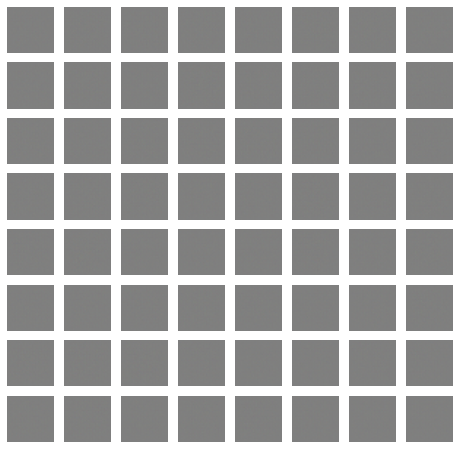

In [180]:
if __name__ == '__main__':
    Gen = Generator()
    Dis = Discriminator()

    g_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0, beta_2=0.9)
    d_optimizer = tf.keras.optimizers.Adam(4e-4, beta_1=0, beta_2=0.9)
    main()